# Basics

`reciprocalspaceship` provides methods for reading and writing MTZ files, and can be easily used to join reflection data by Miller indices. We will demonstrate these uses by loading diffraction data of tetragonal hen egg-white lysozyme (HEWL).

In [1]:
import reciprocalspaceship as rs
print(rs.__version__)

0.9.4


This diffraction data was collected at the Sector 24-ID-C beamline at [NE-CAT](https://lilith.nec.aps.anl.gov/) at APS. Diffraction images were collected at ambient room temperature (295K), and low energy (6550 eV) in order to collect native sulfur anomalous diffraction for experimental phasing. The diffraction images were processed in [DIALS](https://dials.github.io/) for indexing, geometry refinement, and spot integration, and scaling and merging was done in [AIMLESS](http://www.ccp4.ac.uk/html/aimless.html). This data reduction yielded an MTZ file that is included in the `data/` subdirectory. Here, we will load the MTZ file and inspect its contents.

---
### Loading reflection data

Reflection tables can be loaded using the top-level function, `rs.read_mtz()`. This returns a `DataSet` object, that is analogous to a `pandas.DataFrame`. 

In [2]:
refltable = rs.read_mtz("data/HEWL_SSAD_24IDC.mtz")
type(refltable).__name__

'DataSet'

This reflection table was produced directly from `AIMLESS`, and contains several different data columns:

In [3]:
refltable.head()

FreeR_flag     IMEAN   SIGIMEAN      I(+)    SIGI(+)      I(-)  \
H K L                                                                    
0 0 4           14 661.29987  21.953098 661.29987  21.953098 661.29987   
    8            4  3229.649 105.980934  3229.649 105.980934  3229.649   
    12           6 1361.8672   43.06085 1361.8672   43.06085 1361.8672   
    16          19  4124.393  196.89108  4124.393  196.89108  4124.393   
1 0 1           16 559.33685     8.6263 559.33685     8.6263 559.33685   

          SIGI(-)  N(+)  N(-)  
H K L                          
0 0 4   21.953098    16    16  
    8  105.980934    16    16  
    12   43.06085    16    16  
    16  196.89108     8     8  
1 0 1      8.6263    64    64

In [4]:
print(f"Number of reflections: {len(refltable)}")

Number of reflections: 12542


Internally, each of these data columns is stored using a custom `dtype` that was added to the conventional `pandas` and `numpy` datatypes. This enables `DataSet` reflection tables to be written back to MTZ files. There is a `dtype` for each of the possible datatypes listed in the [MTZ file specification](http://www.ccp4.ac.uk/html/f2mtz.html#CTYPOUT). 

In [5]:
refltable.dtypes

FreeR_flag              MTZInt
IMEAN                Intensity
SIGIMEAN                Stddev
I(+)          FriedelIntensity
SIGI(+)         StddevFriedelI
I(-)          FriedelIntensity
SIGI(-)         StddevFriedelI
N(+)                    MTZInt
N(-)                    MTZInt
dtype: object

Additional crystallographic metadata is read from the MTZ file and can be stored as attributes of the `DataSet`. These include the crystallographic spacegroup and unit cell parameters, which are stored as `gemmi.SpaceGroup` and `gemmi.UnitCell` objects. 

In [6]:
refltable.spacegroup

<gemmi.SpaceGroup("P 43 21 2")>

In [7]:
refltable.cell

<gemmi.UnitCell(79.3439, 79.3439, 37.8099, 90, 90, 90)>

---
### Plotting reflection data

For illustrative purposes, let's plot the $I(+)$ data against the $I(-)$ data

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

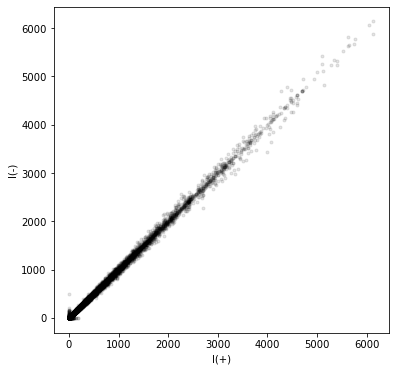

In [9]:
plt.figure(figsize=(6, 6))
plt.plot(refltable['I(+)'], refltable['I(-)'], 'k.', alpha=0.1)
plt.xlabel("I(+)")
plt.ylabel("I(-)")
plt.show()

In the [next example](2_mergingstats.ipynb), we will investigate this anomalous signal in more detail.  

---
### Writing Reflection Data

It is also possible to write out MTZ files using `DataSet.write_mtz()`. This functionality depends on the correct setting of each column's `dtype`.

In [10]:
refltable.write_mtz("data/HEWL_SSAD_24IDC.mtz")